In [109]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [110]:
gld=pdr.get_data_yahoo('GLD', '2016-01-01', '2017-12-31')

In [111]:
gld.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,101.720001,101.309998,101.480003,101.459999,3823600,101.459999
2016-01-04,103.669998,102.489998,103.129997,102.889999,6440000,102.889999
2016-01-05,103.459999,102.930000,103.129997,103.180000,3500300,103.180000
2016-01-06,104.800003,103.930000,104.370003,104.669998,9316600,104.669998
2016-01-07,106.239998,105.190002,105.830002,106.150002,11730400,106.150002


In [112]:
gld.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-22,121.139999,120.570000,120.669998,120.940002,5791300,120.940002
2017-12-26,121.870003,121.510002,121.550003,121.769997,8224400,121.769997
2017-12-27,122.339996,121.879997,122.000000,122.230003,6232700,122.230003
2017-12-28,122.919998,122.559998,122.820000,122.849998,5732700,122.849998
2017-12-29,124.089996,123.459999,123.699997,123.650002,7852100,123.650002


In [113]:
get_close=pd.DataFrame(gld.Close)

In [119]:
get_close['get shift']=get_close.shift()

In [122]:
get_close.head()

,Close,get shift
Date,,
2015-12-31,101.459999,NaN
2016-01-04,102.889999,101.459999
2016-01-05,103.180000,102.889999
2016-01-06,104.669998,103.180000
2016-01-07,106.150002,104.669998


In [123]:
get_close['diff']=get_close.Close-get_close['get shift']
get_close.head()

,Close,get shift,diff
Date,,,
2015-12-31,101.459999,NaN,NaN
2016-01-04,102.889999,101.459999,1.430000
2016-01-05,103.180000,102.889999,0.290001
2016-01-06,104.669998,103.180000,1.489998
2016-01-07,106.150002,104.669998,1.480003


In [132]:
get_close['MA']=get_close.Close.rolling(9).mean().shift()
get_close['MA_12']=get_close.Close.rolling(12).mean()

In [133]:
get_close['MA'].head()

Date
2015-12-31   NaN
2016-01-04   NaN
2016-01-05   NaN
2016-01-06   NaN
2016-01-07   NaN
Name: MA, dtype: float64

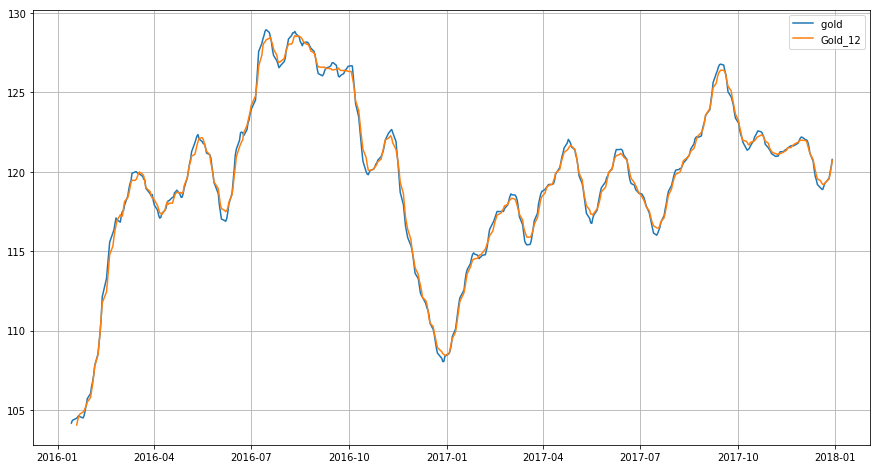

In [135]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(get_close['MA'], label="gold ")
plt.plot(get_close['MA_12'], label="Gold_12")
plt.legend()

In [136]:
get_close['Change']=np.log(get_close['Close']/get_close['Close'].shift())

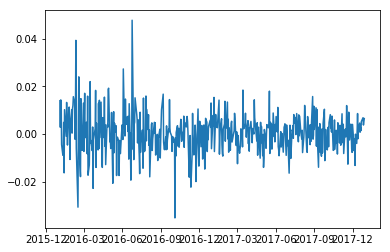

In [137]:
plt.plot(get_close.Change)